In [1]:
# general imports usually needed
import numpy as np
import matplotlib as mpl
import matplotlib.animation
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

In [2]:
# libraries more specific to this lecture notebook
import os.path
import sys
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# notebook wide settings to make plots more readable and visually better to understand
np.set_printoptions(suppress=True)

#%matplotlib widget
#%matplotlib inline

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', titlesize=18)
plt.rc('legend', fontsize=14)
plt.rcParams['figure.figsize'] = (12.0, 8.0) # default figure size if not specified in plot
plt.style.use('seaborn-v0_8-darkgrid')


# K-Nearest Neighbors Algorithm

This notebook is based on the following tutorials:

- https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
- https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
- https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet
performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the
data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about
the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g.
linear-separability, uniform distribution, etc.

In this lecture, we will see how KNN can be implemented with Python's Scikit-Learn library. But before that let's first explore the theory behind KNN
and see what are some of the pros and cons of the algorithm.


## Theory

The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a
new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data
points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like
the one in the following figure.

![knn algorithm figure 1](../../figures/knn-algorithm-1.png)

Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50.
Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest
points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.

![knn algorithm figure 2](../../figures/knn-algorithm-2.png)

The final step of the KNN algorithm is to assign the new point to the class to which the majority of the three nearest points belong. From the figure
above we can see that two of the three nearest points belong to the class "Red" while one belongs to the class "Blue".
Therefore the new data point will be classified as "Red".

## Pros and Cons of KNN

In this section we'll present some of the pros and cons of using the KNN algorithm.

**Pros**

1. It is extremely easy to implement
2. As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
3. Since the algorithm requires no training before making predictions, new data can be added seamlessly.
4. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

**Cons**

1. The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
2. The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
3. Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

## Implementing KNN Algorithm with Scikit-Learn

In this section, we will see how Python's Scikit-Learn library can be used to implement the KNN algorithm
in less than 20 lines of code.

### The Dataset

We are going to use the famous iris data set for our KNN example, which we have run across previously in our class. The dataset consists of
four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The
task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 

We will import the dataset from the library of example datasets in scikit learn.

In [4]:
# import the load_iris frunction from sklearn
from sklearn.datasets import load_iris

# and use it to get the iras data
iris = load_iris()

In [5]:
# first 5 rows of the data and the labels
print(iris.feature_names)
print(iris.data[:5])

print (iris.target_names)
print (iris.target[:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0]


In [6]:
# for convenience, rename data as standard X input features and y output labels
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


The `X` variable contains the first four columns of the dataset (i.e. the attributes) while `y`
contains the labels.

### Train Test Split

As usual to avoid over-fitting and get a sense of how well our classification is doing, we will divide our dataset into training and test splits,
which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on
un-seen data, as it would be in a production application.

To create training and test splits, execute the following.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

The above script splits the dataset into 80% train data and 20% test data. This means that out of total 150 records,
the training set will contain 120 records and the test set contains 30 of those records.

Also recall/notice that the data loaded from sklearn is actually sorted by the target label.  So it is a good idea to make sure that the data was
shuffled when doing the test/train split here.

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [9]:
print(y_train[:30])
print(y_test)

[0 1 2 2 2 1 0 1 2 0 0 0 0 1 0 2 2 1 1 2 2 1 1 2 2 1 2 0 0 1]
[2 2 0 0 2 2 1 0 1 2 0 0 0 0 1 1 2 1 1 1 1 2 2 0 2 0 1 0 0 1 2 1 2 1 1 0 0
 0 2 0 0 1 1 0 0]


### Feature Scaling

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.
Wikipedia explains the reasoning pretty well:

```
Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly
without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance.
If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range
of all features should be normalized so that each feature contributes approximately proportionately to the final distance.
```

The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also converges faster with normalized features.

The following performs feature scaling using sklearn:

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### Training and Predictions

It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is
initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected
after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

The final step is to make predictions on our test data. To do so, execute the following:

In [12]:
y_pred = classifier.predict(X_test)
print(y_pred)

[2 2 0 0 2 1 1 0 1 2 0 0 0 0 1 1 2 1 1 1 1 1 2 0 2 0 1 0 0 1 2 1 2 1 1 0 0
 0 2 0 0 1 2 0 0]


### Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix
and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following results:

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  0  0]
 [ 0 14  1]
 [ 0  2 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      0.93      0.90        15
           2       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



The results show that our KNN algorithm was able to classify the 45 records in the test set with close to 100% accuracy,
which is excellent. Although the algorithm performed very well with this dataset, don't expect the same results with all applications.
As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.

### Comparing Error Rate with the K Value

In the training and prediction section we said that there is no way to know beforehand which value of K that yields the
best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following:

In [14]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and
the result is appended to the error list.

The next step is to plot the error values against K values. Execute the following to create the plot:

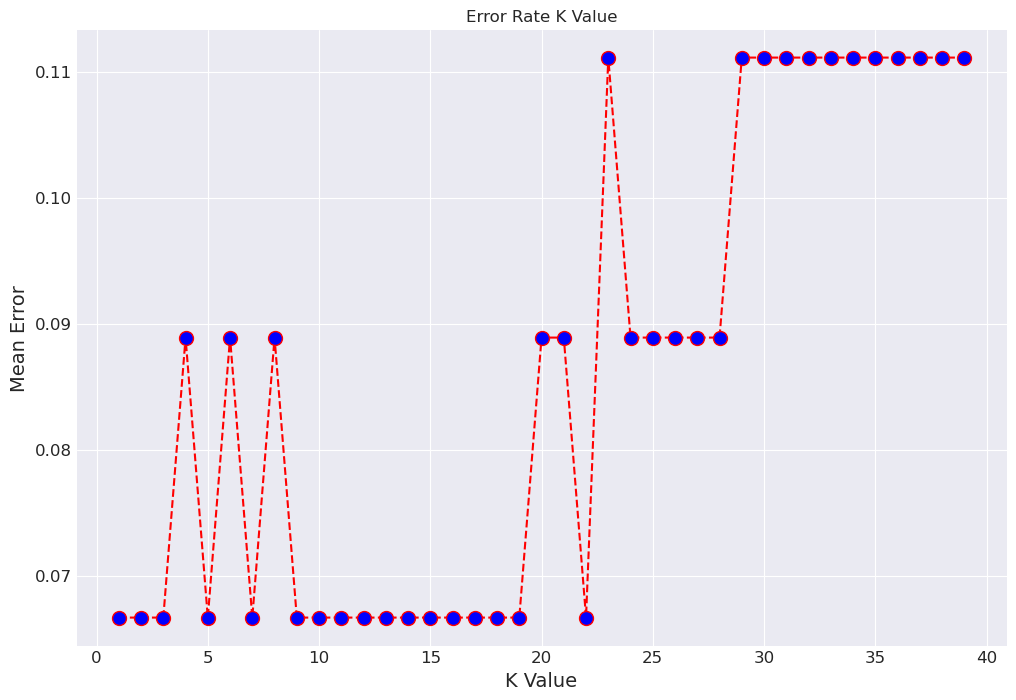

In [15]:
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error');

From the output we can see that the mean error is best (smallest) when the value of the K is between 5 and 18. I would advise
you to play around with the value of K and the train/test split here to see how it impacts the accuracy of the predictions.
Also cross validation would be useful here as well as the data set is not particular large, so getting a good handle on the optimal
setting for K can be difficult.

### Conclusion 

KNN is a simple yet powerful classification algorithm. It requires no training for making predictions, which is typically one of the most
difficult parts of a machine learning algorithm. The KNN algorithm have been widely used to find document similarity and pattern
recognition. It has also been employed for developing recommender systems and for dimensionality reduction and pre-processing steps
for computer vision, particularly face recognition tasks.

We did not show it here, but KNN can also be used for regression tasks.  The algorith works in the same way, by calculating a distance
or similarity measure, and choosing the K nearest neighbors.  But when the output target is a real valued regression target, we simply
average the K nearest neighbors outputs (or use some other method, like median etc. to combine them).  You need to use the
`KNeigborsRegressor` of scikit-learn if you wan to do a KNN regression.
